# **CAP 5768: Introduction to Data Science**
## Final Project Program: Visualization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('../../cleaned_dataset.csv')

# Set seaborn style
sns.set_style("whitegrid")

pollutants = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'Overall AQI']

In [ ]:
# Histograms & Density Plots
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[pollutant], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f"Distribution of {pollutant}")

plt.tight_layout()
plt.show()

In [ ]:
# NO2 Mean Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['NO2 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers for NO2 AQi")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# O3 Mean Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['O3 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers for O3 AQI")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# SO2 Mean Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['SO2 AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers for SO2 AQI")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# CO Mean Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['CO AQI'])
plt.title("Boxplot of Pollutants to Identify Outliers for CO AQI")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = data[pollutants].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

In [ ]:

sns.pairplot(data[pollutants], diag_kind='kde')
plt.suptitle("Pairplot of Pollutants and Overall AQI", y=1.02)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[pollutants], inner="quartile")
plt.title("Violin Plot of Pollutant AQI Distributions")
plt.xticks(rotation=45)
plt.show()

In [ ]:
pollutant_proportions = data[pollutants].div(data["Overall AQI"], axis=0).mean()

plt.figure(figsize=(10, 6))
pollutant_proportions.plot(kind="bar", colormap="coolwarm", alpha=0.75)
plt.title("Average Contribution of Pollutants to Overall AQI")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.kdeplot(data[pollutant], label=pollutant, fill=True, alpha=0.3)
plt.title("KDE Plot of AQI Distributions")
plt.legend()
plt.show()

In [ ]:
print(data.columns)

In [ ]:
# Drop non-numeric columns (like AQI Category)
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation with Overall AQI and sort
correlations = numeric_data.corr()['Overall AQI'].drop('Overall AQI').sort_values()

# Turn into DataFrame for seaborn plotting
corr_df = correlations.reset_index()
corr_df.columns = ['Feature', 'Correlation']

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x='Correlation', y='Feature', palette='coolwarm')

# Add value annotations
for index, row in corr_df.iterrows():
    plt.text(x=row['Correlation'], y=index, 
             s=f"{row['Correlation']:.2f}", 
             va='center', ha='right' if row['Correlation'] < 0 else 'left', 
             fontsize=9, color='black')

plt.title('Feature Correlation with Overall AQI')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


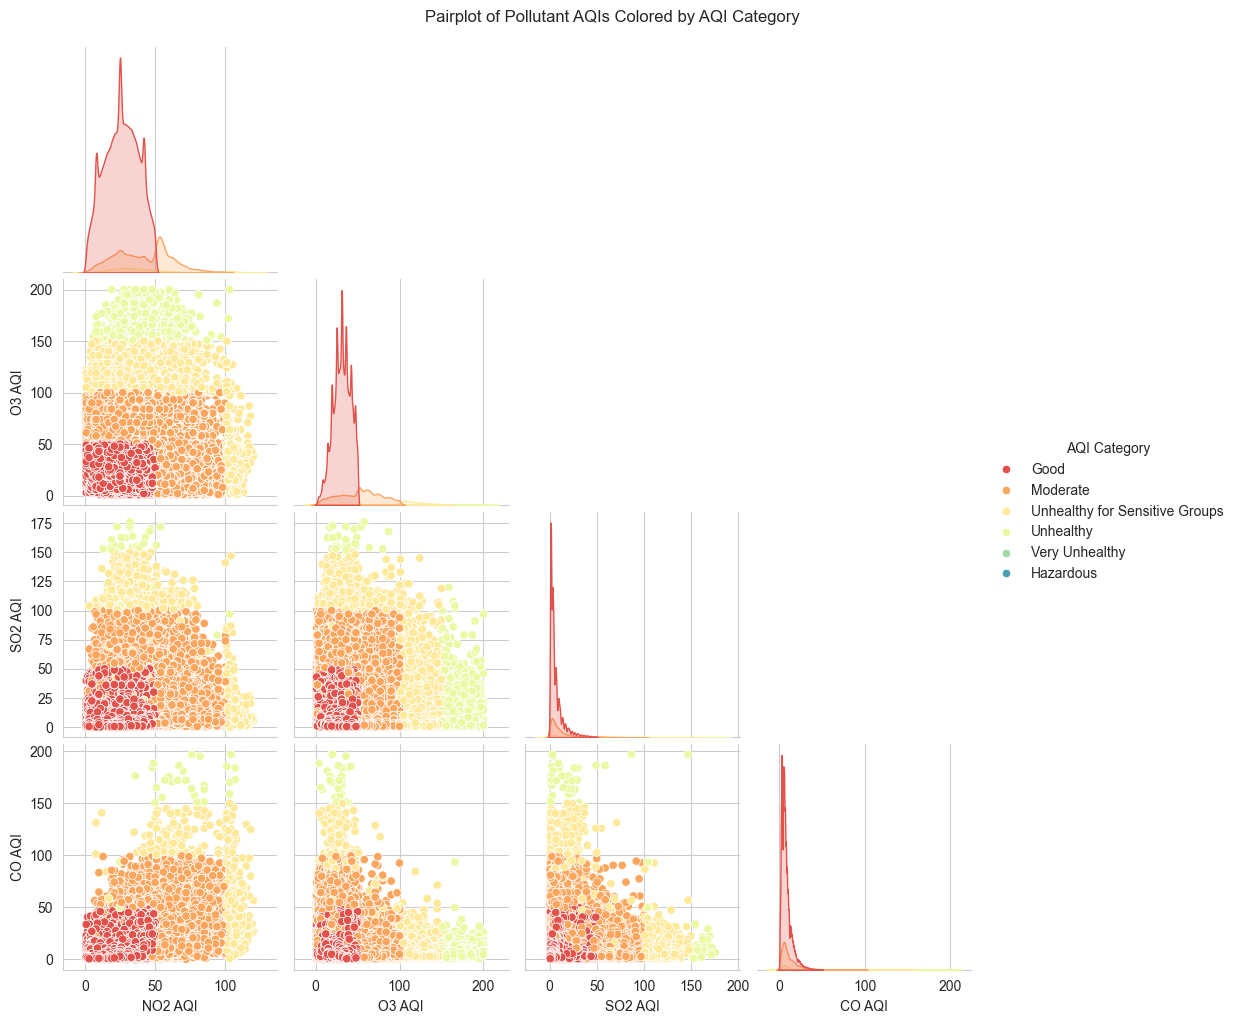

In [ ]:
#This one's not very insightful

# Step 1: Bin Overall AQI into categories (if not already done)
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
data['AQI Category'] = pd.cut(data['Overall AQI'], bins=bins, labels=labels)

# Step 2: Choose a few key features to avoid overplotting
selected_features = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI', 'AQI Category']

# Step 3: Create pairplot
sns.pairplot(data[selected_features], hue='AQI Category', palette='Spectral', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Pollutant AQIs Colored by AQI Category', y=1.02)
plt.show()